# Bank Satatements analysis

Importing all necessary libraries Initial data exploration provided a comprehensive understanding of the dataset's structure, revealing the distribution of different product categories and identifying any missing values or anomalies.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

load data from a JSON file named and create a pandas DataFrame from it.

In [2]:

with open('P1- BankStatements.json', 'r') as file:
    data = json.load(file)

In [3]:
# Extract the transactions
transactions = data['Account']['Transactions']['Transaction']

In [4]:
# Convert transaction data to a DataFrame
df = pd.DataFrame(transactions)
df.head()

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
0,DEBIT,CARD,100.0,2180.80,2023-06-27T09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
1,DEBIT,CARD,170.0,2010.80,2023-06-28T09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
2,DEBIT,CARD,500.0,1510.80,2023-07-26T10:04:00+05:30,2023-07-26,S31451661,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06T11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA
4,DEBIT,ATM,1000.0,525.80,2023-08-07T17:13:13+05:30,2023-08-07,S18475743,ATM/CASH/321917012791/XXXXXXXXXXXX8896,NA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   type                  985 non-null    object
 1   mode                  985 non-null    object
 2   amount                985 non-null    object
 3   currentBalance        985 non-null    object
 4   transactionTimestamp  985 non-null    object
 5   valueDate             985 non-null    object
 6   txnId                 985 non-null    object
 7   narration             985 non-null    object
 8   reference             985 non-null    object
dtypes: object(9)
memory usage: 69.4+ KB


In [6]:
df.shape

(985, 9)

### 1.  Transaction Analysis

1. What is the total number of transactions made over the year?


In [7]:
total_transactions = len(df)
print("the total transactions made is", total_transactions)

the total transactions made is 985


In [8]:
largest_transaction = df['amount'].astype(float).max()
largest_transaction

45000.0

In [9]:
summary_stats = df['amount'].astype(float).describe()
summary_stats

count      985.000000
mean       855.492802
std       3007.515100
min          1.000000
25%         40.000000
50%        160.000000
75%        500.000000
max      45000.000000
Name: amount, dtype: float64

2. What is the distribution of transaction amounts (e.g., small vs. large transactions)?(define small and large transactions by yourself)

In [10]:
# let assume the transaction is over 500 is large and the trasaction is less the 500 are small trasaction
small_threshold= 500
df['transaction_size'] = df['amount'].astype(float).apply(lambda x: 'small' if x < small_threshold else 'large')
transaction_size_distribution = df['transaction_size'].value_counts()
transaction_size_distribution

transaction_size
small    687
large    298
Name: count, dtype: int64

from above analysis we can said that there are total 687 trasaction are small and 298 are large

3. Analyze the frequency of different transaction types (debit vs. credit).

In [11]:
# Classify transactions by type
debit_transactions = [txn for txn in transactions if txn['type'] == 'DEBIT']
credit_transactions = [txn for txn in transactions if txn['type'] == 'CREDIT']

# Frequency of transaction types
debit_transaction_count = len(debit_transactions)
credit_transaction_count = len(credit_transactions)
print('Debit', debit_transaction_count)
print('Credit',credit_transaction_count)

Debit 695
Credit 290


/var/folders/pv/15fyzy594y119j4vrsqjgsc00000gn/T/ipykernel_10031/3565609657.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, transactions_type_count[i] + 5, str(transactions_type_count[i]), ha='center')


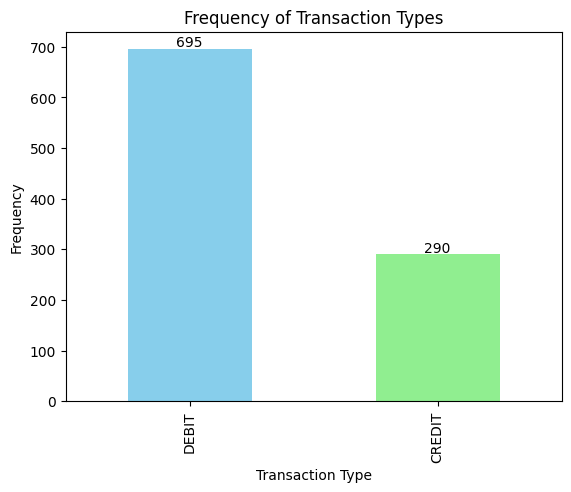

In [12]:
transactions_type_count = df['type'].value_counts()
ax = transactions_type_count.plot(kind='bar', color=['skyblue', 'lightgreen'])


plt.title('Frequency of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')


for i in range(len(transactions_type_count)):
    plt.text(i, transactions_type_count[i] + 5, str(transactions_type_count[i]), ha='center')
plt.show()

Based on the analysis there

1. DEBIT transactions:  695
2. CREDIT transactions: 290

### 2.  Balance Analysis

1. What is the trend of the account balance over time?

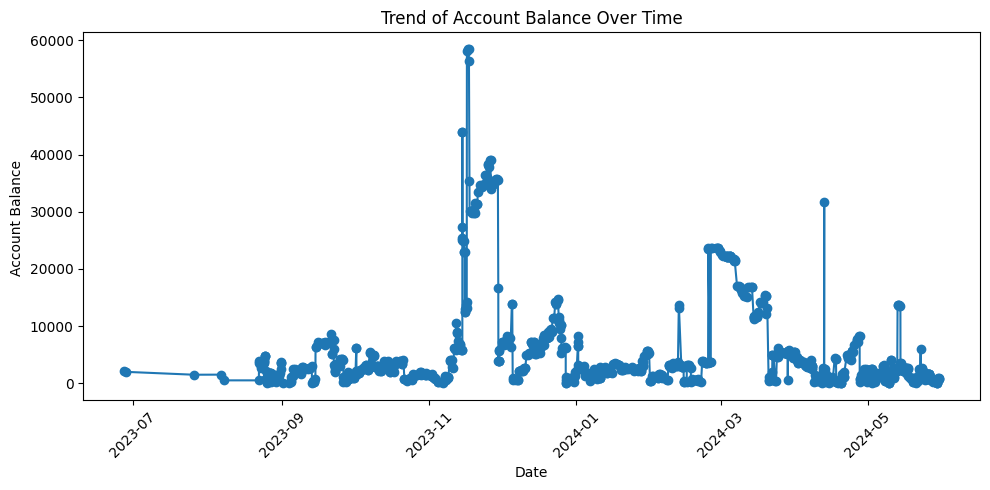

In [13]:
# Extract balance and timestamps
timestamps = [datetime.fromisoformat(txn['transactionTimestamp'].replace('T', ' ').replace('+05:30', '')) for txn in transactions]
balances = [float(txn['currentBalance']) for txn in transactions]



# the trend of account balance over time
plt.figure(figsize=(10, 5))
plt.plot(timestamps, balances, marker='o')
plt.xlabel('Date')
plt.ylabel('Account Balance ')
plt.title('Trend of Account Balance Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Stable Periods: Consistent balances from July to September 2023 and January to May 2024.
2. High Volatility: Notable spike in November 2023 followed by fluctuations.
3. Significant Transactions: Large deposits or withdrawals around November 2023.



2. Identify any periods with significant changes in the account balance.


In [14]:
balance_changes = np.diff(balances) # blance change

significant_threshold = 1000

# Identify significant changes
significant_changes = [(timestamps[i+1], balances[i], balances[i+1], balance_changes[i])
                       for i in range(len(balance_changes))
                       if abs(balance_changes[i]) > significant_threshold]

# Create a DataFrame
df_significant = pd.DataFrame(significant_changes,
                              columns=['Date', 'Previous Balance', 'New Balance', 'Change'])

# Sort by date
df_significant = df_significant.sort_values('Date')

# Format the output
print("Major Changes in Your Account Balance")

print()

for index, row in df_significant.iterrows():
    date = row['Date'].strftime('%B %d, %Y')
    previous_balance = f"${row['Previous Balance']:,.2f}"
    new_balance = f"${row['New Balance']:,.2f}"
    change = row['Change']

    if change > 0:
        change_type = "Increase"

    else:
        change_type = "Decrease"


    change_amount = f"${abs(change):,.2f}"

    print(f"Date: {date}")
    print(f"Type of Change: {change_type}")
    print(f"Amount of Change: {change_amount}")
    print(f"Balance Before: {previous_balance}")
    print(f"Balance After: {new_balance}")
    print()

print("Summary")

print(f"Total number of major changes: {len(df_significant)}")
print(f"Largest increase: ${df_significant['Change'].max():,.2f}")
print(f"Largest decrease: ${abs(df_significant['Change'].min()):,.2f}")

Major Changes in Your Account Balance

Date: August 22, 2023
Type of Change: Increase
Amount of Change: $3,000.00
Balance Before: $524.80
Balance After: $3,524.80

Date: August 23, 2023
Type of Change: Decrease
Amount of Change: $1,200.00
Balance Before: $3,824.80
Balance After: $2,624.80

Date: August 25, 2023
Type of Change: Decrease
Amount of Change: $2,480.00
Balance Before: $4,724.80
Balance After: $2,244.80

Date: August 25, 2023
Type of Change: Decrease
Amount of Change: $1,450.00
Balance Before: $2,244.80
Balance After: $794.80

Date: August 27, 2023
Type of Change: Decrease
Amount of Change: $1,499.00
Balance Before: $1,814.80
Balance After: $315.80

Date: August 29, 2023
Type of Change: Decrease
Amount of Change: $1,200.00
Balance Before: $1,395.80
Balance After: $195.80

Date: August 31, 2023
Type of Change: Increase
Amount of Change: $1,200.00
Balance Before: $2,550.80
Balance After: $3,750.80

Date: September 01, 2023
Type of Change: Decrease
Amount of Change: $3,500.00
Ba

Trend Analysis & Largest/Smallest Changes
1. Account balance shows increasing trend with occasional decreases.

2. Largest increase: 2,540.00 (from 26,650.34 to 29,190.34)
 on May 10, 2024.
3. Smallest decrease:  750.00 (from 17,759.34 to 16,279.34) on April 6, 2024.


### 3.  Spending Patterns

1.  What are the main categories of expenses (e.g., fuel, Ecommerce, food, shopping, ATM withdrawals, UPI transactions)?


In [15]:
# Define expense categories based on narration keywords
categories = {
    'fuel': ['FILLING', 'PETROL', 'FUEL'],
    'ecommerce': ['AMAZON', 'FLIPKART', 'E-COMMERCE'],
    'food': ['RESTAURANT', 'FOOD', 'DINING'],
    'shopping': ['SHOP', 'MALL'],
    'atm_withdrawal': ['ATM', 'CASH'],
    'upi_transactions': ['UPI']
}

# Classify expenses
expenses = {category: [] for category in categories}
for txn in debit_transactions:
    for category, keywords in categories.items():
        if any(keyword in txn['narration'].upper() for keyword in keywords):
            expenses[category].append(float(txn['amount']))
            break

# Calculate frequency and amount of spending in each category
category_summary = {category: {'count': len(expenses[category]), 'amount': sum(expenses[category])} for category in expenses}
category_summary



df_1 = pd.DataFrame.from_dict(category_summary, orient='index')

df_1 = df_1.reset_index().rename(columns={'index': 'Category'})

df_1 = df_1[['Category', 'count', 'amount']]

df_1.columns = ['Category', 'Number of Transactions', 'Total Amount ($)']
df_1['Total Amount ($)'] = df_1['Total Amount ($)'].apply(lambda x: f'${x:,.2f}')
print(df_1.to_string(index=False))


        Category  Number of Transactions Total Amount ($)
            fuel                       4          $830.00
       ecommerce                       0            $0.00
            food                       0            $0.00
        shopping                       0            $0.00
  atm_withdrawal                       3       $13,500.00
upi_transactions                     688      $407,759.90


the main categories of expenses are UPI Transactions and ATM Withdrawals

1. Fuel: 4 transactions, $830 spent.

2. E-commerce: No transactions
3. Food: No transactions
4. Shopping: No transactions
5. ATM Withdrawals: 3 transactions, $13,500 withdrawn

6. UPI Transactions: 688 transactions, $407,759.90 spent

2. Analyze the frequency and amount of spending in each category.


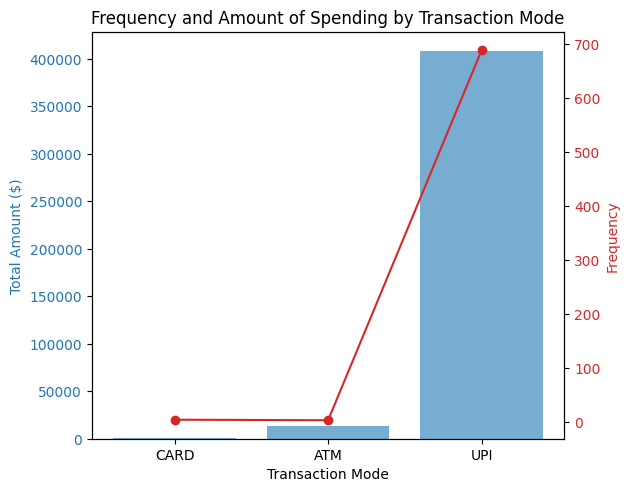

{'CARD': {'amount': 830.0, 'frequency': 4},
 'ATM': {'amount': 13500.0, 'frequency': 3},
 'UPI': {'amount': 407759.9000000001, 'frequency': 688}}

In [16]:
from collections import defaultdict
# Categorize transactions and compute the total amount and frequency in each category
categories = defaultdict(lambda: {'amount': 0, 'frequency': 0})

for transaction in transactions:
    mode = transaction['mode']
    amount = float(transaction['amount'])
    if transaction['type'] == 'DEBIT':
        categories[mode]['amount'] += amount
        categories[mode]['frequency'] += 1

# Convert defaultdict to a regular dict
categories = dict(categories)

# Plotting the data
modes = list(categories.keys())
amounts = [categories[mode]['amount'] for mode in modes]
frequencies = [categories[mode]['frequency'] for mode in modes]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Transaction Mode')
ax1.set_ylabel('Total Amount ($)', color=color)
ax1.bar(modes, amounts, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Frequency', color=color)
ax2.plot(modes, frequencies, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Frequency and Amount of Spending by Transaction Mode')
plt.show()

categories

The frequency and amount of spending in each category is

1. CARD:

  Total Amount: $830.00.     
  Frequency: 4 transactions

2. ATM:
  
  Total Amount: $13,500.00.   
  Frequency: 3 transactions

3. UPI:

  Total Amount: $407,759.90.  
  Frequency: 688 transactions

### 4.  Income Analysis

1. What are the main sources of income (e.g., salary, UPI credits)?

In [17]:
# Define income sources based on narration keywords
income_sources = {
    'salary': ['SALARY'],
    'upi_credits': ['UPI', 'IntPd']
}

# Classify income
income = {source: [] for source in income_sources}
for txn in credit_transactions:
    for source, keywords in income_sources.items():
        if any(keyword in txn['narration'].upper() for keyword in keywords):
            income[source].append(float(txn['amount']))
            break

# Calculate frequency and amount of income from each source
income_summary = {source: {'count': len(income[source]), 'amount': sum(income[source])} for source in income}

# Convert to DataFrame
df_2 = pd.DataFrame.from_dict(income_summary, orient='index')
df_2 = df_2.reset_index().rename(columns={'index': 'Category'})
df_2 = df_2[['Category', 'count', 'amount']]

print(df_2)

      Category  count    amount
0       salary      0       0.0
1  upi_credits    101  179333.0


the main sources of income is upi_credits with

count = 101.  
amount = $179,333

2. Identify any patterns in the timing and amount of income received.

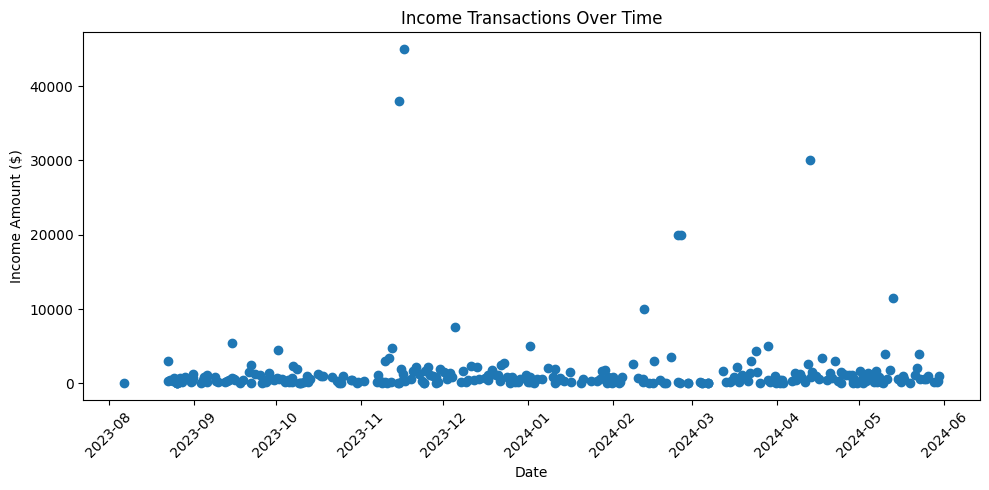

In [18]:
# Extract timestamps and amounts for income transactions
income_timestamps = [datetime.fromisoformat(txn['transactionTimestamp'].replace('T', ' ').replace('+05:30', '')) for txn in credit_transactions]
income_amounts = [float(txn['amount']) for txn in credit_transactions]

# Plot the income transactions over time
plt.figure(figsize=(10, 5))
plt.plot(income_timestamps, income_amounts, marker='o', linestyle='None')
plt.xlabel('Date')
plt.ylabel('Income Amount ($)')
plt.title('Income Transactions Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

t
he data shows income transactions over time. There is no clear trend, but there might be seasonality with peaks in December and January.

### 5.  Alert Generation

 1. Identify any unusual or suspicious transactions.

In [19]:
# Set the threshold for big transactions
big_transaction_amount = 2000

# Initialize an empty list to store big transactions
big_transactions = []

# Iterate through each transaction
for transaction in transactions:
    # Convert the transaction amount to a float
    amount = float(transaction['amount'])

    # Check if the transaction amount exceeds the threshold
    if amount > big_transaction_amount:
        # Extract the transaction date and format it
        date = datetime.fromisoformat(transaction['transactionTimestamp'].replace('Z', '+00:00'))
        formatted_date = date.strftime("%B %d, %Y")

        # Append the transaction details to the big_transactions list
        big_transactions.append({
            'date': formatted_date,
            'amount': amount,
            'description': transaction['narration']
        })

# Print the Big Transaction Report
print("Big Transaction Detective Report")
print(f"We consider any transaction over ${big_transaction_amount} as 'big'.")
print(f"We found {len(big_transactions)} big transactions!")

# Go through the big transactions and print their details
for i, transaction in enumerate(big_transactions, 1):
    print(f"\nBig Transaction #{i}:")
    print(f"Date: {transaction['date']}")
    print(f"Amount: ${transaction['amount']:,.2f}")
    print(f"What it was for: {transaction['description']}")

Big Transaction Detective Report
We consider any transaction over $2000 as 'big'.
We found 76 big transactions!

Big Transaction #1:
Date: August 22, 2023
Amount: $3,000.00
What it was for: UPI/323441197152/114914/UPI/8795417446ybl/Paym

Big Transaction #2:
Date: August 25, 2023
Amount: $2,480.00
What it was for: UPI/323779418599/102438/UPI/Q201531625ybl/Paym

Big Transaction #3:
Date: September 01, 2023
Amount: $3,500.00
What it was for: UPI/324450376631/104241/UPI/KAYUMTRADERSicici/

Big Transaction #4:
Date: September 13, 2023
Amount: $3,000.00
What it was for: UPI/362228688034/101932/UPI/kayumtradersicici/

Big Transaction #5:
Date: September 14, 2023
Amount: $5,500.00
What it was for: IMPS/P2A/325721171918/PHONEPEPRIVATEL/IMPSAXB9111

Big Transaction #6:
Date: September 21, 2023
Amount: $3,500.00
What it was for: UPI/363099470087/130505/UPI/9910619719ybl/Paym

Big Transaction #7:
Date: September 21, 2023
Amount: $2,500.00
What it was for: UPI/326414745806/192825/UPI/8178328660ybl/

Identify any unusual or suspicious transactions.So first we identify high transaction

High Volume: 76 transactions over $2,000 indicate significant financial activity.

1. Patterns:Multiple transactions on the same dates (e.g., three on November 14, 2023).
2. Frequent use of UPI and NEFT.
Notable Transactions: Large single transactions like 37,999 on November 14, 2023, and 45,000 on November 16, 2023.
3. Scrutiny Areas:
Repeated transactions with the same entities suggest further review for legitimacy.
High-value cash withdrawals (e.g., $10,000 on February 13, 2024) could pose risks.

2. Generate alerts for low balance or high expenditure periods.

In [20]:

very_low_money = 500
big_spending = 1000
# the time when account have less money
low_money_times = []
for date, balance in zip(timestamps, balances):
    if balance < very_low_money:
        formatted_date = date.strftime("%B %d, %Y")
        low_money_times.append({'date': formatted_date, 'balance': balance})

# Find big expenses
big_expenses = []
for transaction in debit_transactions:
    amount = float(transaction['amount'])
    if amount > big_spending:
        date = datetime.fromisoformat(transaction['transactionTimestamp'].replace('Z', '+00:00'))
        formatted_date = date.strftime("%B %d, %Y")
        big_expenses.append({'date': formatted_date, 'amount': amount})


In [21]:
compare_times = []
for low_time in low_money_times:
    for expense in big_expenses:
        if low_time['date'] == expense['date']:
            compare_times.append({'date': low_time['date'], 'balance': low_time['balance'], 'expense': expense['amount']})

print("\n Comparison of low balance and big expenses:")
for time in compare_times:
    print(f"On {time['date']}, you had ${time['balance']:.2f} and spent ${time['expense']:.2f}")



 Comparison of low balance and big expenses:
On August 25, 2023, you had $175.80 and spent $2480.00
On August 25, 2023, you had $175.80 and spent $1450.00
On August 25, 2023, you had $145.80 and spent $2480.00
On August 25, 2023, you had $145.80 and spent $1450.00
On August 25, 2023, you had $196.80 and spent $2480.00
On August 25, 2023, you had $196.80 and spent $1450.00
On August 27, 2023, you had $315.80 and spent $1499.00
On August 29, 2023, you had $195.80 and spent $1200.00
On September 01, 2023, you had $0.80 and spent $3500.00
On September 13, 2023, you had $29.80 and spent $3000.00
On September 13, 2023, you had $429.80 and spent $3000.00
On September 26, 2023, you had $153.80 and spent $3000.00
On December 27, 2023, you had $145.51 and spent $5000.00
On December 27, 2023, you had $130.51 and spent $5000.00
On January 06, 2024, you had $383.51 and spent $1500.00
On January 31, 2024, you had $330.81 and spent $5000.00
On January 31, 2024, you had $430.81 and spent $5000.00
On 

In [22]:

data = []
# finding the time when accoount has Low balance
for date, balance in zip(timestamps, balances):
    if balance < very_low_money:
        formatted_date = date.strftime("%B %d, %Y")
        data.append({'Date': formatted_date, 'Balance': balance, 'Spent': 0, 'Alert': 'Low Balance'})


# finding the big expenses
for transaction in debit_transactions:
    amount = float(transaction['amount'])
    if amount > big_spending:
        date = datetime.fromisoformat(transaction['transactionTimestamp'].replace('Z', '+00:00'))
        formatted_date = date.strftime("%B %d, %Y")
        data.append({'Date': formatted_date, 'Balance': 0, 'Spent': amount, 'Alert': 'High Expenditure'})

df_5 = pd.DataFrame(data)
df_5

,Date,Balance,Spent,Alert
0,"August 25, 2023",175.8,0.0,Low Balance
1,"August 25, 2023",145.8,0.0,Low Balance
2,"August 25, 2023",196.8,0.0,Low Balance
3,"August 26, 2023",195.8,0.0,Low Balance
4,"August 27, 2023",315.8,0.0,Low Balance
...,...,...,...,...
145,"May 07, 2024",0.0,1500.0,High Expenditure
146,"May 10, 2024",0.0,2000.0,High Expenditure
147,"May 14, 2024",0.0,10000.0,High Expenditure
148,"May 17, 2024",0.0,1300.0,High Expenditure




1. Low Balance: Many times, the account balance went below $500, which might mean not having enough money.

2. Big Spending: Some transactions were over $1000, which is a lot of money going out.

3. Patterns: These low balance and big spending events often happen around the same times, showing when financial struggles happen.
4. Financial Stress: When the balance is low and spending is high at the same time, it's a sign of financial trouble.


### Conclusion

1. Transactions: There were 983 transactions in total. Most were small, with 687 under $500 and 298 larger.

2. Balance: The account balance was steady for most of the year, except for November 2023 when large transactions happened.

3. Spending: Most money was spent through UPI (688 transactions) and ATM withdrawals (3 transactions).

4. Income: The main source of income was UPI credits (101 transactions).
5. Alerts: Alerts were generated when the balance was low (under 500) or spending was high (over $1000). These often happened at the same time, showing potential financial struggles.


The analysis shows regular income and spending patterns, with occasional financial stress due to large transactions and low balance. Monitoring these patterns can help manage finances better and plan for future stability.